## Loading the olivette dataset

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn import datasets
from sklearn import model_selection
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import models
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.utils import np_utils

data = datasets.fetch_olivetti_faces()
label = data['target']
data = data['images']
train_data, tmp_d, train_label, tmp_l = model_selection.train_test_split(data, label, test_size=0.2)
valid_data, test_data, valid_label, test_label = model_selection.train_test_split(tmp_d, tmp_l, test_size=0.5)
data = data.reshape(400, 64, 64, 1)
train_data = train_data.reshape(320, 64, 64, 1)
valid_data = valid_data.reshape(40, 64, 64, 1)
test_data = test_data.reshape(40, 64, 64, 1)

# 10 class labels, 400 samples.

Using TensorFlow backend.


## Visualizing Dataset

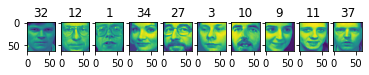

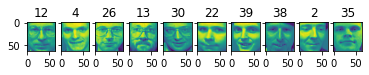

In [2]:
def display(data, labels):
    show_labels = train_data[:10]
    show_data = test_data[:10]
    f, ax = plt.subplots(1, 10, sharey=True)
    for x in range(10):
        ax[x].imshow(data[x])
        ax[x].set_title(labels[x])
    plt.show()
    
display(train_data, train_label)
display(test_data, test_label)

# One-hot vector
label = keras.utils.to_categorical(label, num_classes= 40) 
train_label = keras.utils.to_categorical(train_label, num_classes= 40) 
valid_label = keras.utils.to_categorical(valid_label, num_classes= 40) 
test_label = keras.utils.to_categorical(test_label, num_classes= 40) 

## Model 1

In [3]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(5, (5, 5), activation='tanh', input_shape=(64, 64, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(10, (5, 5), activation='tanh'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(1000, activation='tanh'))
model_1.add(layers.Dense(40, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 5)         130       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        1260      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1691000   
_________________________________________________________________
dense_2 (Dense)              (None, 40)               

## Model 2

In [4]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (3, 3), activation='tanh', input_shape=(64, 64, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(15, (3, 3), activation='tanh'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (3, 3), activation='tanh'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(1000, activation='tanh'))
model_2.add(layers.Dense(40, activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 15)        1365      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 20)        2720      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 720)              

## Compile and Train Model 1

In [5]:
import datetime

model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

start = datetime.datetime.now()
m1_hist = model_1.fit(train_data,  # Features
                      train_label,  # Target vector
                      epochs=50,  # Number of epochs
                      verbose=0,  # Print description after each epoch
                      batch_size=8,  # Number of observations per batch
                      validation_data=(valid_data, valid_label))  # Data for evaluation
end = datetime.datetime.now()

In [6]:
# print loss/acc over test dataset
loss, acc = model_1.evaluate(test_data, test_label)
print('Accuracy (Test): %.3f' % (acc * 100))
print('Loss     (Test): %.3f' % (loss))

# print loss/acc over entire dataset
loss, acc = model_1.evaluate(data, label)
print('Accuracy (Entire): %.2f' % (acc * 100))
print('Loss     (Entire): %.2f' % (loss))

print("Total time taken:", end - start)

40/40 [==============================] - 0s 2ms/step
Accuracy (Test): 97.500
Loss     (Test): 0.045
400/400 [==============================] - 0s 257us/step
Accuracy (Entire): 99.50
Loss     (Entire): 0.03
Total time taken: 0:00:25.113526


## Compile and Train Model 2

In [7]:
model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

start = datetime.datetime.now()
m2_hist = model_2.fit(train_data,  # Features
                      train_label,  # Target vector
                      epochs=50,  # Number of epochs
                      verbose=0,  # Print description after each epoch
                      batch_size=8,  # Number of observations per batch
                      validation_data=(valid_data, valid_label))  # Data for evaluation
end = datetime.datetime.now()

In [8]:
# print loss/acc over test dataset
loss, acc = model_2.evaluate(test_data, test_label)
print('Accuracy (Test): %.3f' % (acc * 100))
print('Loss     (Test): %.3f' % (loss))

# print loss/acc over entire dataset
loss, acc = model_2.evaluate(data, label)
print('Accuracy (Entire): %.2f' % (acc * 100))
print('Loss     (Entire): %.2f' % (loss))

print("Total time taken:", end - start)

40/40 [==============================] - 0s 2ms/step
Accuracy (Test): 95.000
Loss     (Test): 0.206
400/400 [==============================] - 0s 287us/step
Accuracy (Entire): 99.25
Loss     (Entire): 0.03
Total time taken: 0:00:12.881062


## Visualizing the learned features - Model 1

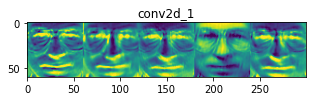

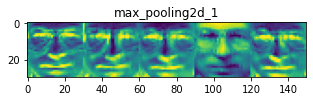

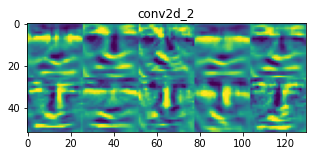

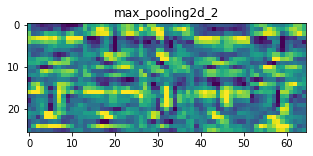

In [9]:
def visualize_weights(model, num):
    img_tensor = test_data[0]
    img_tensor = img_tensor.reshape(1, 64, 64, 1)
    layer_outputs = [layer.output for layer in model.layers[:6]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers[:num]:
        layer_names.append(layer.name)
    images_per_row = 5
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :,col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size: (col + 1) * size,row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
visualize_weights(model_1, 4)

## Visualizing the learned features - Model 2

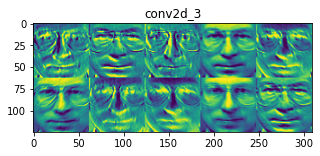

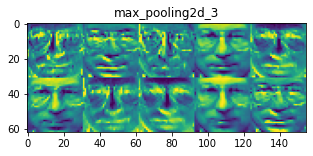

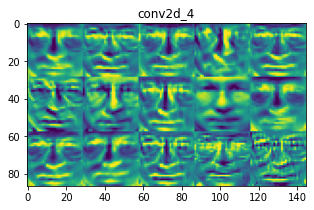

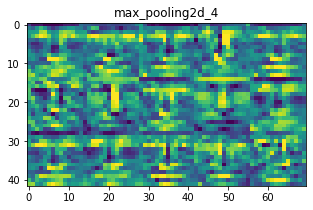

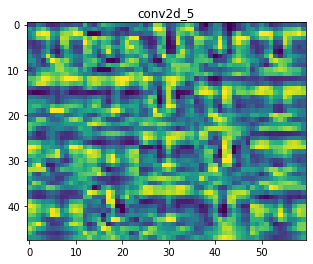

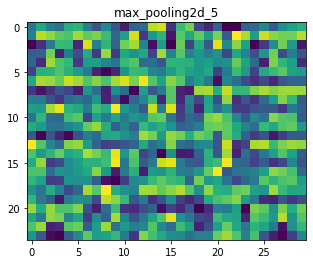

In [10]:
visualize_weights(model_2, 6)

## Plotting Loss/Acc

In [17]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

def plot_hist(history):
    loss, acc = history.history['loss'], history.history['accuracy']
    val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy']
    epochs = range(len(loss))
    plt.plot(epochs,smooth_curve(acc), label='Smoothed training acc')
    plt.plot(epochs,smooth_curve(val_acc), label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs,smooth_curve(loss), label='Smoothed training loss')
    plt.plot(epochs,smooth_curve(val_loss), label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### Model 1

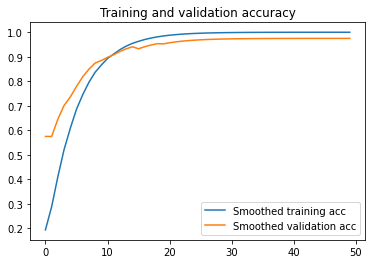

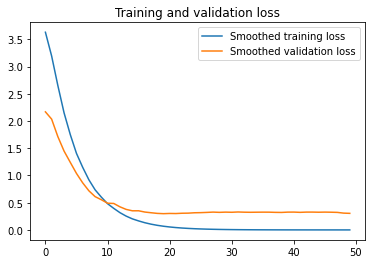

In [18]:
plot_hist(m1_hist)

### Model 2

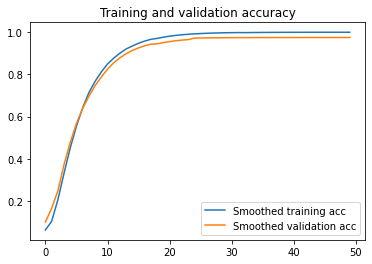

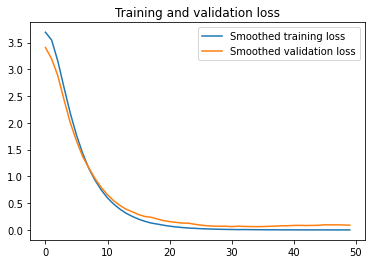

In [19]:
plot_hist(m2_hist)

## Results and Conclusions

Overall, in terms of accuracy, Model 2 is better as shown in table 2. This is likely due to having that additional layer of convolution which gives the model more features to work with. Furthermore, the filter size is smaller which means that the convolution preserves more data.

Initially, I had expected model 1 to have way fewer parameters compared to model 2 due to having fewer convolution layers. However, I was surprised to see in the model summary that model 1 actually has MORE trained parameters. This is likely due to the filter size. Even though model 2 has more convolution layers, it has a 3x3 filter size which means that each kernel will only have 9 learned parameters. Comparing this to model 1 which uses 5x5 filters (25 parameters) would explain the difference in number of learned parameters. 

From the plots of the loss and accuracy, we can see that model 2 is far superior to model 1 in every aspect, including having a shorter training time. The reduced training time is likely the result of having fewer learned parameters. Both models seem to not overfit though. 

In conclusion, it is important to note that just because we have more convolution layers does not mean that a model will be slower. It is imperative that proper analysis be done to show the number of parameters, etc.